# PLANEJAMENTO DA SOLUÇÃO

## Passo 1 - Escolha do Método

- Teste A/B: Comparar duas versões de preenchimento dos dados de cartão, para avaliar qual é mais efetivo.

## Passo 2 - Design de Experimento

#### Formação das hipóteses

(Provavelmente: Novo método dá X%¨mais dinheiro que o base)
- Hipótese Nula:
- Hipótese Alternativa:


- Tipo de teste: ? ( Maior ou Menor --> Uma calda).
- Nível de confiança: 95% (padrão para experimentos que não envolvem riscos elevados). --> Provavelmente poderia ser 90%

#### Escolha da variável

- ticket médio (Quanto dinheiro o cliente gastou / Quantidade de compras).

#### Separação dos grupos

- Grupo controle: Grupo A.
- Grupo tratamento: Grupo B.
- Tamanho da Amostra de cada grupo: Calcular levando em consideração nível de confiança, power e diferença esperada.
- Avaliação de homogeneidade entre os grupos:
  - Plotar os gráficos comparando diferentes categorias.
  - Avaliar o tempo.
  - Caso necessário filtrar com mais rigidez clientes homogêneos.

## Passo 3 - Coletando os dados

#### Coleta dos dados

Disponível em: https://drive.google.com/file/d/1oUJLeAgSaUI7CA-0F14KG0FzXEim7pSe/view

#### Preparação dos dados

- Fazer DATA DESCRIPTION e FEATURE ENGINEERING com os dados.

#### Métrica dos grupos

Calculo de ticket
- É necessário saber o ticket baseline ou só com a diferença requerida do negócio é possível realizar o teste?
  - Como calcular o baseline do grupo de controle? 
  - Média por um período ou não é necessário? 

## Passo 4 - Testando as hipóteses

#### Definição do método de inferência estatística

Buscar fontes para saber qual dos testes usar ( proporção, conversão, volume ) ?
- t-Test
-ANOVA
- Chi-Squared

#### Cálculo do p-valor

## Passo 5 - Tirando conclusões

- Interpretação do p-valor
  - É maior ou menor que o alfa escolhido?
- Validação das hipóteses iniciais?
  - Hipotése rejeitada?
- Conclusão
  - O efeito da mudança foi provado ou não?
- Cálculo do número de vendas potencial
- Cálculo do faturamento potencial
  - Provavelmente --> Dada a mudança quanto vou ganhar a mais?


# 0.5. IMPORTS

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import statsmodels.api as st

from IPython.core.display import HTML

## 0.5.1. Helper Functions

In [155]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = 24
    
    display(HTML ('<style>.container { width:95% !important; } </style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows=50
    pd.set_option('display.expand_frame_repr', False)
       
    sns.set()
    
jupyter_settings()

## 0.2. Loading Data

In [5]:
data_raw = pd.read_csv('../datasets/ab_testing.csv')

# 1.0. PASSO 01 - DATA DESCRIPTION

In [6]:
df1 = data_raw.copy()

## 1.1. Rename Columns

## 1.2. Data Dimensions

In [7]:
print(f'N rows: {df1.shape[0]}')
print(f'N columns: {df1.shape[1]}')

N rows: 45883
N columns: 8


## 1.3. Data Types

In [13]:
df1.dtypes

uid                   int64
country              object
gender               object
spent                 int64
purchases             int64
date         datetime64[ns]
group                object
device               object
dtype: object

In [11]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.4. Check NA

In [12]:
df1.isna().sum()

uid          0
country      0
gender       0
spent        0
purchases    0
date         0
group        0
device       0
dtype: int64

## 1.5. Fillout NA's

## 1.6. Verifying Types

## 1.7. Descriptive Statistics

In [122]:
num_attributes = df1.select_dtypes(include=['int64', 'float64']).drop(columns=['uid'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Attributes

In [123]:
descriptive_num = num_attributes.describe().transpose()
descriptive_num['range'] = descriptive_num['max'] - descriptive_num['min']
descriptive_num['skew'] = num_attributes.skew()
descriptive_num['kurtosis'] = num_attributes.kurtosis()

descriptive_num = descriptive_num.rename(columns = {'50%':'median'})

descriptive_num = descriptive_num[['min', 'max','range','mean','median','std', 'skew', 'kurtosis']]
descriptive_num.round(1)

,min,max,range,mean,median,std,skew,kurtosis
spent,99.0,12170.0,12071.0,1883.5,1596.0,1363.9,1.4,2.6
purchases,1.0,30.0,29.0,4.5,4.0,3.1,1.3,2.6


### 1.7.1. Categorical Attributes

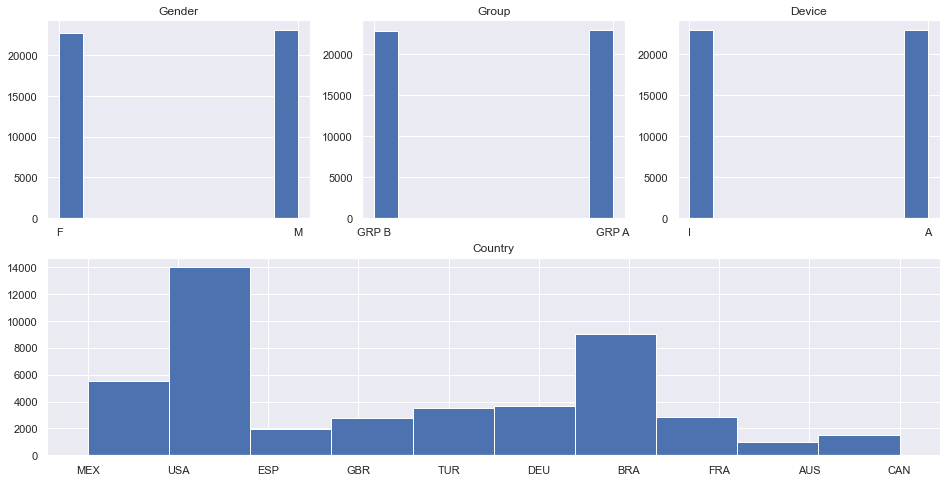

In [157]:
plt.subplot(2,3,1)
cat_attributes['gender'].hist().set_title('Gender')
plt.subplot(2,3,2)
cat_attributes['group'].hist().set_title('Group')
plt.subplot(2,3,3)
cat_attributes['device'].hist().set_title('Device')

plt.subplot(2,3,(4,6))
cat_attributes['country'].hist().set_title('Country')

plt.show()

# 2.0. PASSO 02 - FEATURE ENGINEERING

In [201]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

## 2.2. Criacao das Hipoteses

### 2.1.1. Hipoteses Loja

### 2.1.2. Hipoteses Produto

### 2.1.3. Hipoteses Tempo

## 2.3. Lista final de hipoteses
--> Selecionando as hipoteses que posso validar com os dados nesse momento

## 2.4. Feature Engineering

In [202]:
# Criação da variável principal
df2['ticket'] = df2['spent'] / df2['purchases']

In [203]:
# Ordenando por data
df2 = df2.sort_values('date')

In [204]:
# Quantidade no grupo por data
df2['accumulated_groupA'] = (df2['group'] == 'GRP A').cumsum()
df2['accumulated_groupB'] = (df2['group'] == 'GRP B').cumsum()

# 3.0. PASSO 03 - FILTRAGEM DE VARIAVEIS

In [205]:
df3 = df2.copy()

## 3.1. Filtragem das Linhas

## 3.2. Filtragem das Colunas

# 4.0. PASSO 04 - ANALISE EXPLORATORIA DOS DADOS

In [206]:
df4 = df3.copy()

## 4.1. Analise Univariada

### 4.1.1. Response Variable

### 4.1.2. Numerical Variable

### 4.1.3. Categorical Variable

## 4.2. Analise Bivariada

### Clientes em cada grupo por Categorias

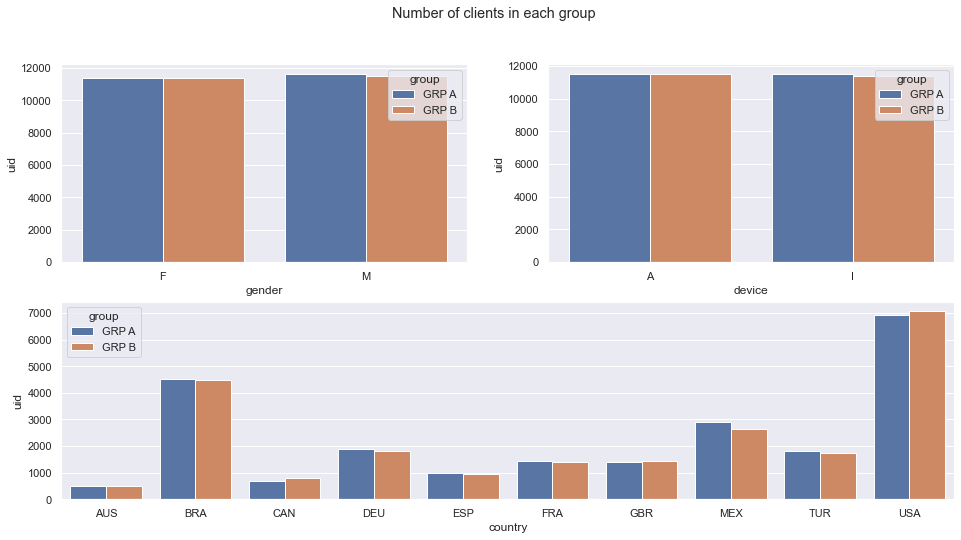

In [210]:
plt.suptitle('Number of clients in each group') 

plt.subplot(2,2,1)
coluna = 'gender'
df_aux = df4.groupby(['group', coluna]).count().reset_index()
sns.barplot(data=df_aux, y='uid', x=coluna, hue='group')

plt.subplot(2,2,2)
coluna = 'device'
df_aux = df4.groupby(['group', coluna]).count().reset_index()
sns.barplot(data=df_aux, y='uid', x=coluna, hue='group')

plt.subplot(2,2,(3,4))
coluna = 'country'
df_aux = df4.groupby(['group', coluna]).count().reset_index()
sns.barplot(data=df_aux, y='uid', x=coluna, hue='group');

### Ticket médio em cada grupo por Categorias

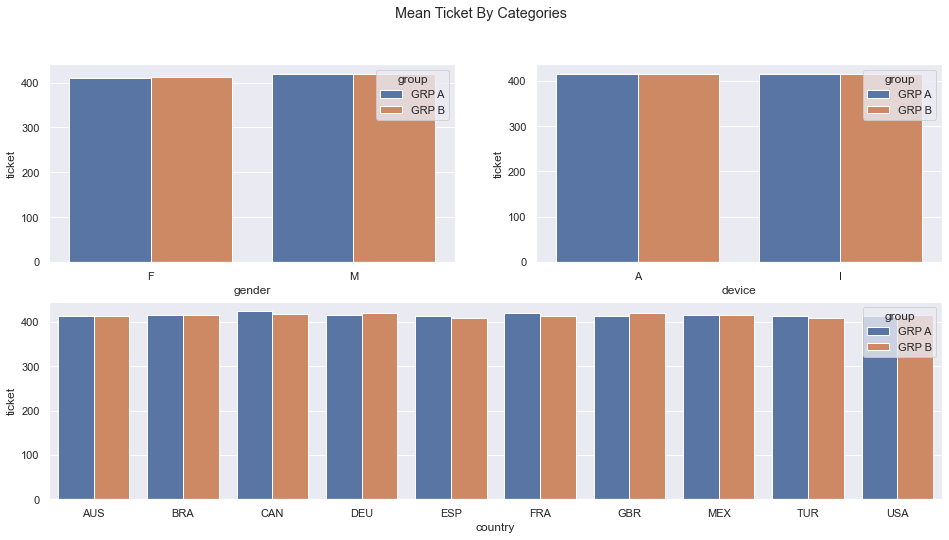

In [199]:
plt.suptitle('Mean Ticket By Categories') 

plt.subplot(2,2,1)
coluna = 'gender'
df_aux = df4.groupby(['group', coluna]).mean().reset_index()
sns.barplot(data=df_aux, y='ticket', x=coluna, hue='group')

plt.subplot(2,2,2)
coluna = 'device'
df_aux = df4.groupby(['group', coluna]).mean().reset_index()
sns.barplot(data=df_aux, y='ticket', x=coluna, hue='group')

plt.subplot(2,2,(3,4))
coluna = 'country'
df_aux = df4.groupby(['group', coluna]).mean().reset_index()
sns.barplot(data=df_aux, y='ticket', x=coluna, hue='group');

###  Quantidade total de clientes em cada grupo por Data

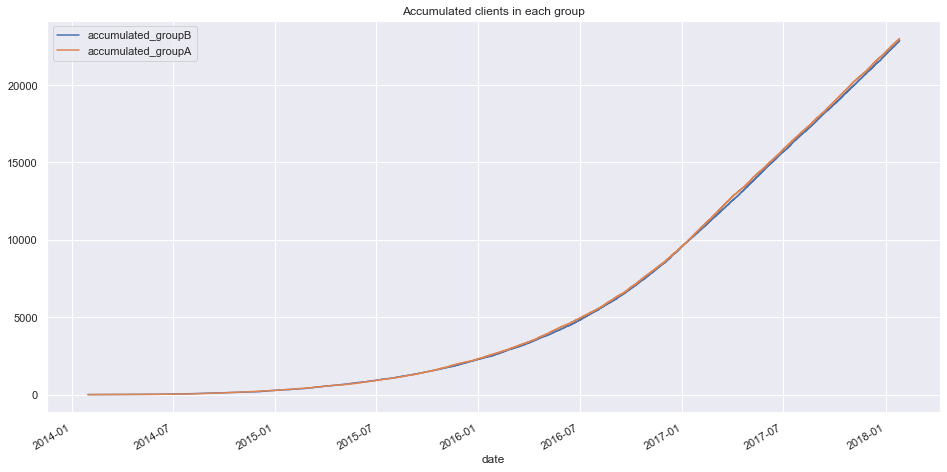

In [211]:
df_aux = df4.copy()
df_aux = df_aux.set_index('date', drop=True)

ax = df_aux.plot(y='accumulated_groupB', kind='line')
df_aux.plot(y='accumulated_groupA', kind='line', ax=ax).set_title('Accumulated clients in each group');

### 4.2.1. Resumo das Hipoteses

## 4.3. Analise Multivariada

### 4.3.1. Numerical Attributes

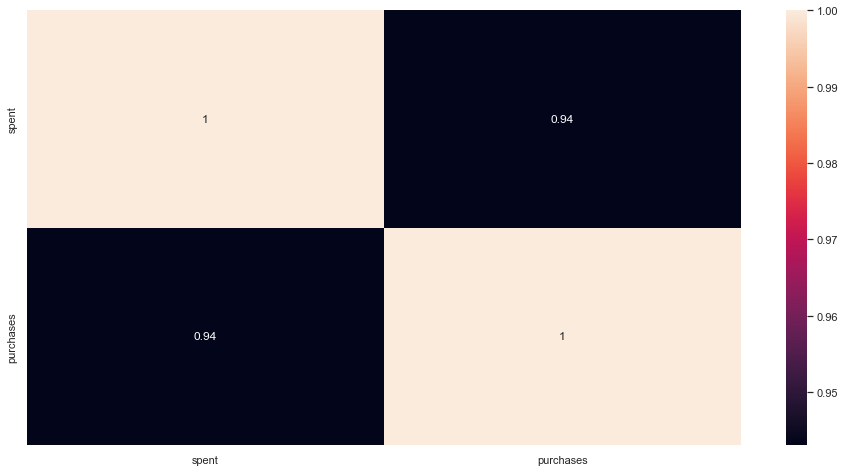

In [171]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

### 4.3.2. Categorical Attributes

# 5.0. PASSO 05 - PREPARAÇAO DOS DADOS

# 6.0. PASSO 06 - FEATURE SELECTION

## 6.1. Split dataframe into training and test

## 6.2. Feature Selection

# 7.0. PASSO 07 - MACHINE LEARNING MODELLING

## 7.6. Compare Model's Performance

### 7.6.1. Single Performance

### 7.6.1. Real Performance - Cross Validation

# 8.0. PASSO 08 - HYPERPARAMETER FINE TUNING

# 9.0. PASSO 09 - TRADUCAO E INTERPRETACAO DO ERRO

## 9.1. Business Performance

## 9.2. Total Performance

## 9.3. Machine Learning Performance

# 10.0. PASSO 10 - DEPLOY MODEL